In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt

import os
import cv2
import numpy as np

import torch
import tensorflow as tf

In [2]:
#no use in this note book
def load_video_frames( video_path, frames_per_clip, step_between_clips):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % step_between_clips == 0:
            if len(frames) < frames_per_clip:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                frames.append(torch.tensor(frame))
        frame_count += 1
    cap.release()
    return frames

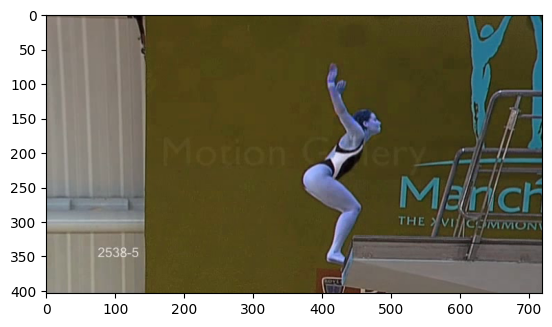

In [3]:
import matplotlib.pyplot as plt
# This is the first sample of Diving water, I copy it into the current directory
cap = cv2.VideoCapture(r'.\2538-5_70133.avi')

ret, frame = cap.read()   

plt.figure()
plt.imshow(frame)

In [4]:
# Total number of frames in video
print("Total frame:",cap.get(cv2.CAP_PROP_FRAME_COUNT))
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

Total frame: 55.0
Height 404.0, Width 720.0
FPS : 10.00


In [5]:
cap.release() #release RAM

In [6]:
cap = cv2.VideoCapture(r'.\2538-5_70133.avi')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (404, 720, 3)


In [7]:
## Helper function for plotting opencv images in notebook
# Color difference from above one
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

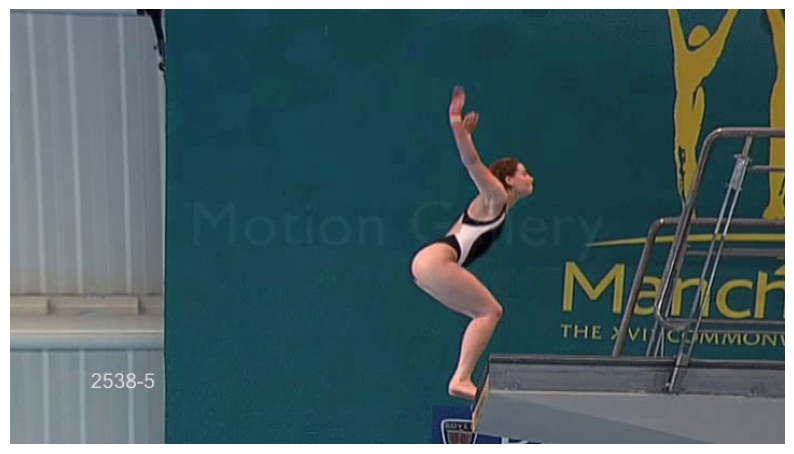

In [8]:
display_cv2_img(img)

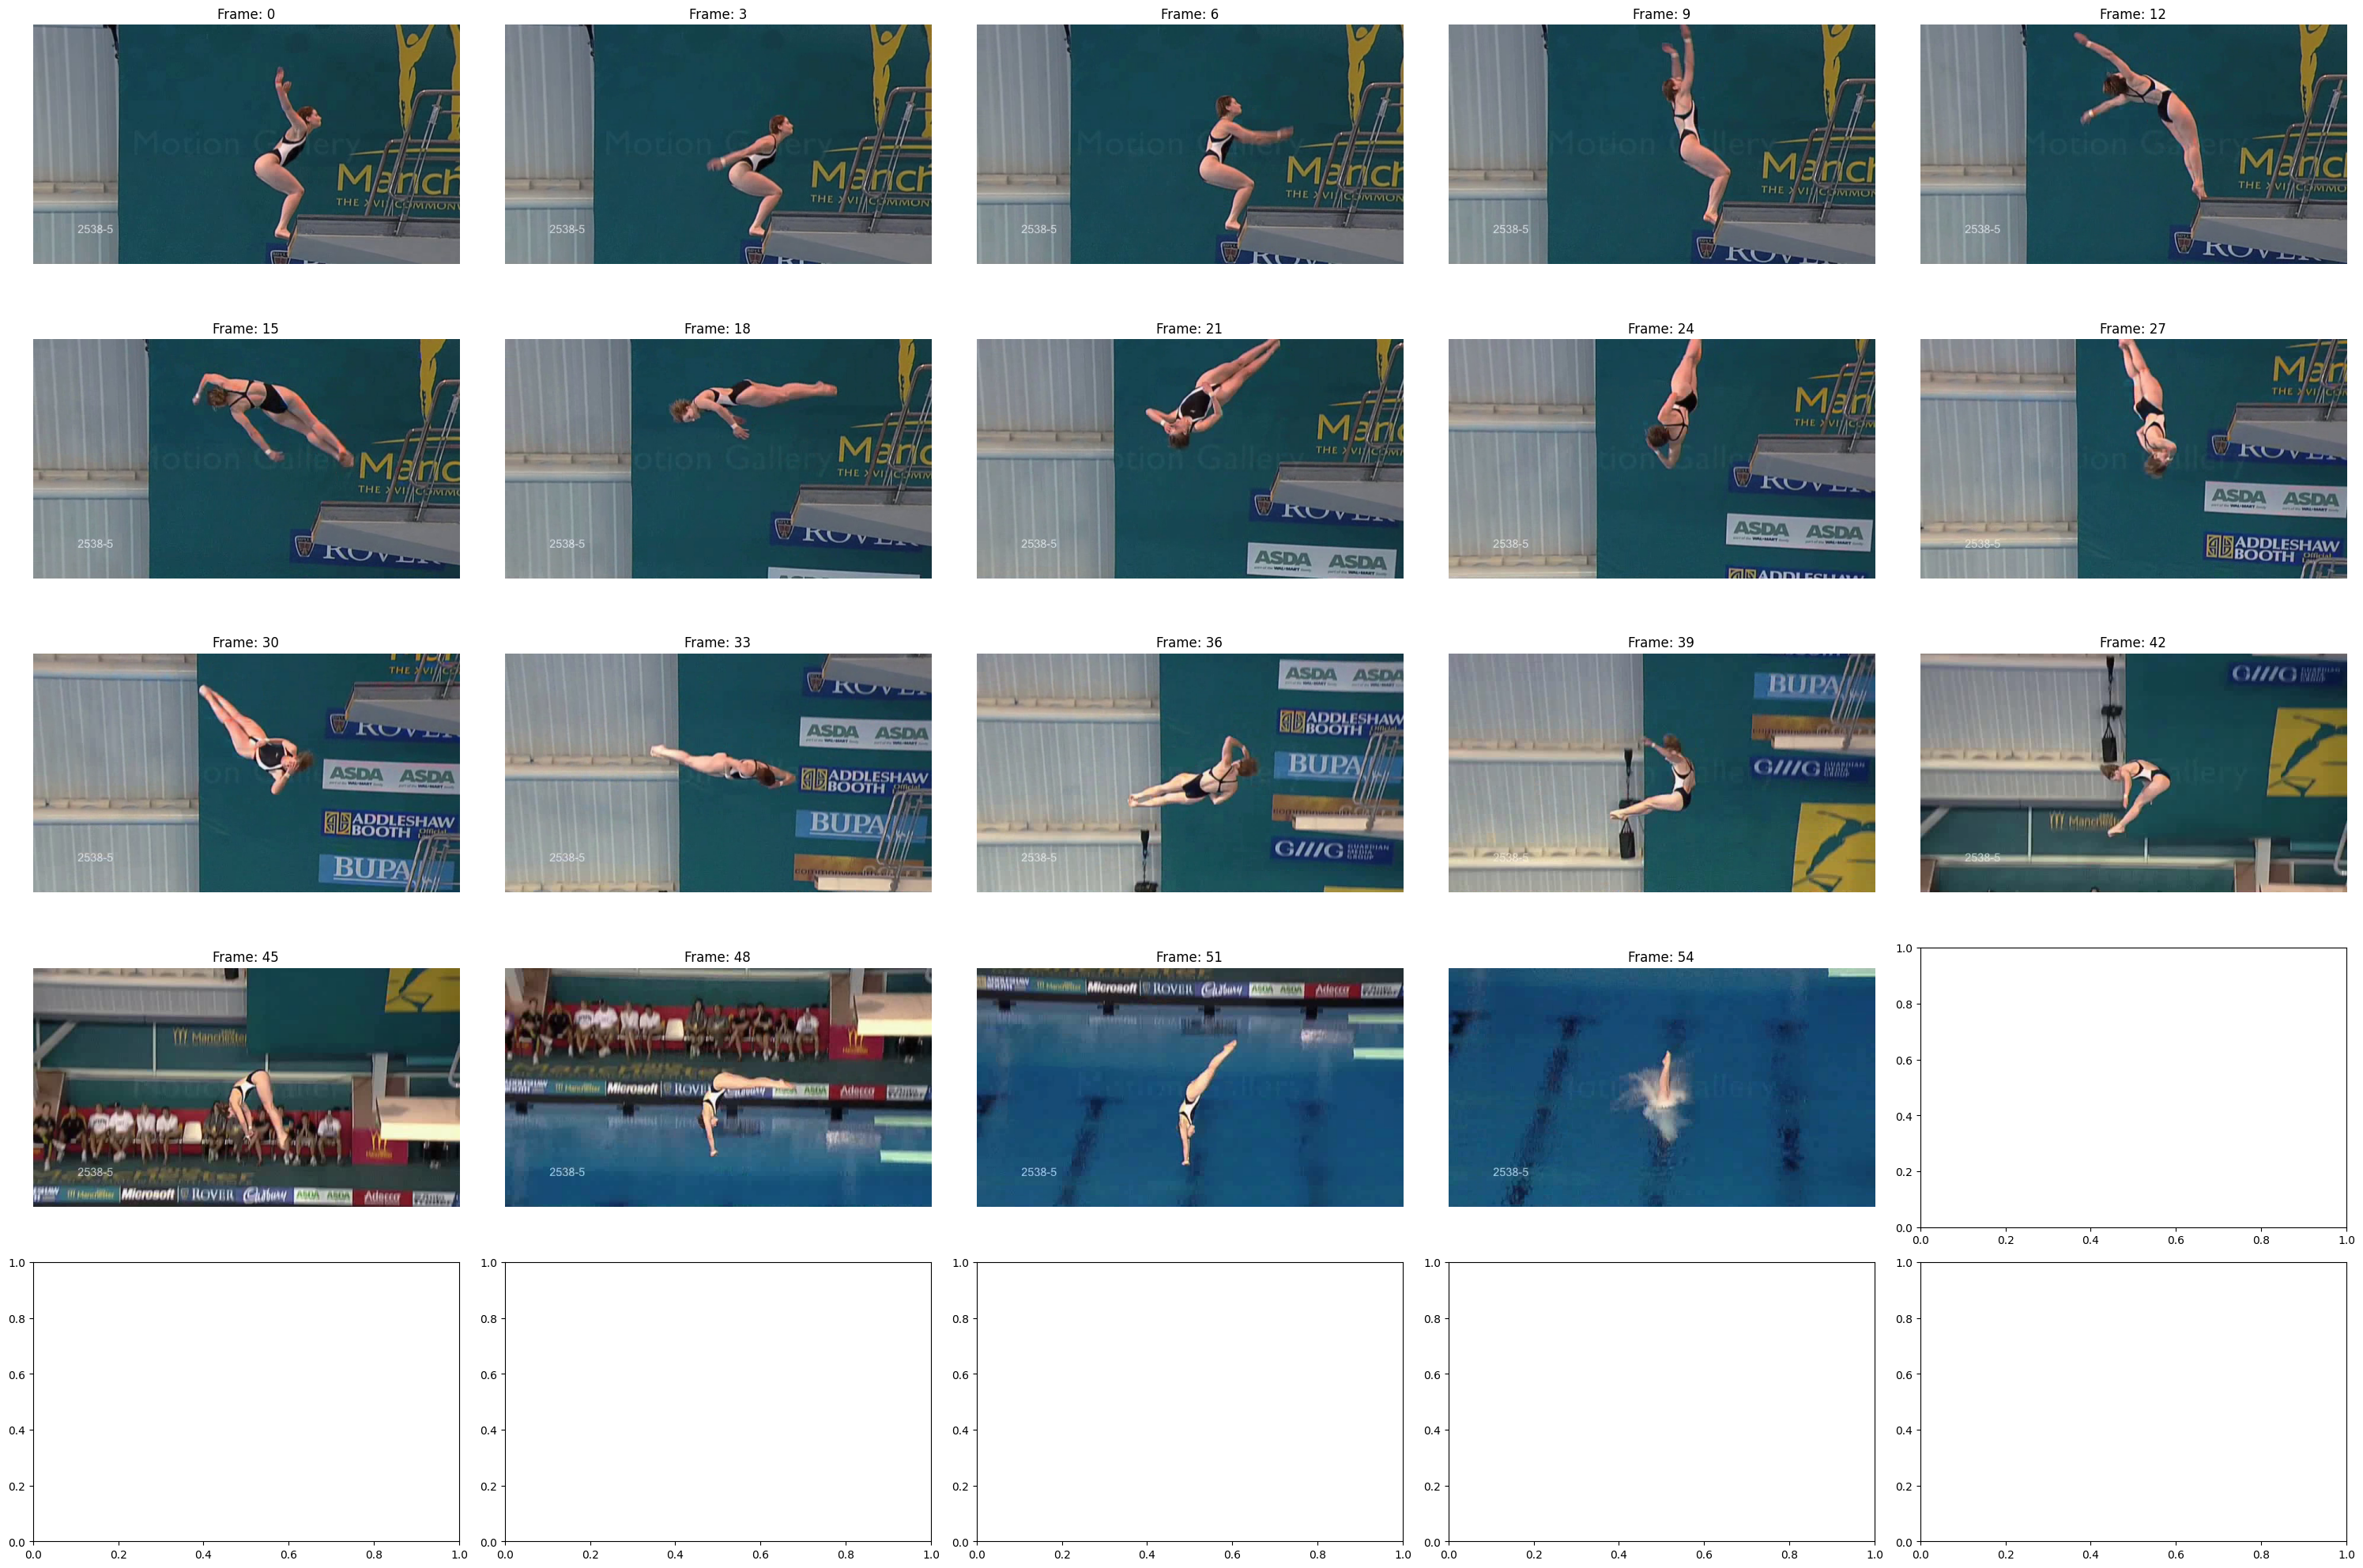

In [9]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture(r'.\2538-5_70133.avi')
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 3 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

In [10]:
def get_folders_name():
    # Get a list of all files in the current directory
    current_directory = os.getcwd()

    # List all files and directories in the current directory
    entries = os.listdir(current_directory)

    # Filter out directories from all entries
    directories = [entry for entry in entries if os.path.isdir(os.path.join(current_directory, entry))]

    return directories

In [13]:
import os
import csv

root_dir = os.path.join(os.getcwd(), "ucf action")

csv_file_path = 'train_data.csv'

#Wirte CSV
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['video_path', 'label'])  #Write title 

    #Find all subdirectories in the root directory (label1, label2...)
    for label in os.listdir(root_dir):
        label_dir = os.path.join(root_dir, label)
        
        # make sure this is a directory
        if os.path.isdir(label_dir):
            
            for subdir in os.listdir(label_dir):
                subdir_path = os.path.join(label_dir, subdir)
                
                # Find all the samples in the subdirectory (001,002...)
                for file in os.listdir(subdir_path):
                    
                    if file.endswith('.avi'):
                        
                        video_path = os.path.join(subdir_path, file)
                        writer.writerow([video_path, label])  
